# Abhinav Thota

## Research Interest
I am interested in investigating where the ideal location in California (in terms of house pricing) is based on its location.

Specifically, would a location that is equidistant to all nearby city centres be better or would it be more expensive the closer it is to one city. If so, which city in particular. 

It would also be interesting to investigate between house types and households as it gets further away from a city centre. Maybe it's close to one of the urban city models.

UPDATE:
After doing my EDA, I wanted to examine how the rooms per household may change based on median income. However, I did manage to answer these original research interests through my EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#makes plots show in notebook
%matplotlib inline

%reload_ext autoreload
%autoreload 2

rawHouse_df = pd.read_csv("../data/raw/California_Houses.csv")
rawHouse_df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Milestone 3
### Task 1: EDA on my dataset
#### Understanding my variables
Most of these variables are self-explanatory, however there are a few things that need to be clarified:
 
 1. A lot of these calculations are from blocks, what exactly is a "block"?

Reading the dataset on Kaggle, showed that a block is a sample, that on average, "includes 1425.5 individuals living in a geographically compact area" [source](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). If they were all to have the same population, then if a block's population density increases, the area of the block decreases.

I wanted to verify this, so I ran the following code...

In [2]:
population  = pd.DataFrame(data = rawHouse_df, columns = ["Population"])
population.mean()

Population    1425.476744
dtype: float64

 2. What units are population, median income and distances calculated in?
- The unit of population is simply the total number of people in the block
- The unit of median income is in 10s of thousands of dollars
- The unit of distances is calculated in metres

## EDA Visualizations

I also wanted to get a better understanding of how the data is distributed.

In [3]:
rawHouse_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


That doesn't really help me visualize what's going on, so I will try making a histogram plot.

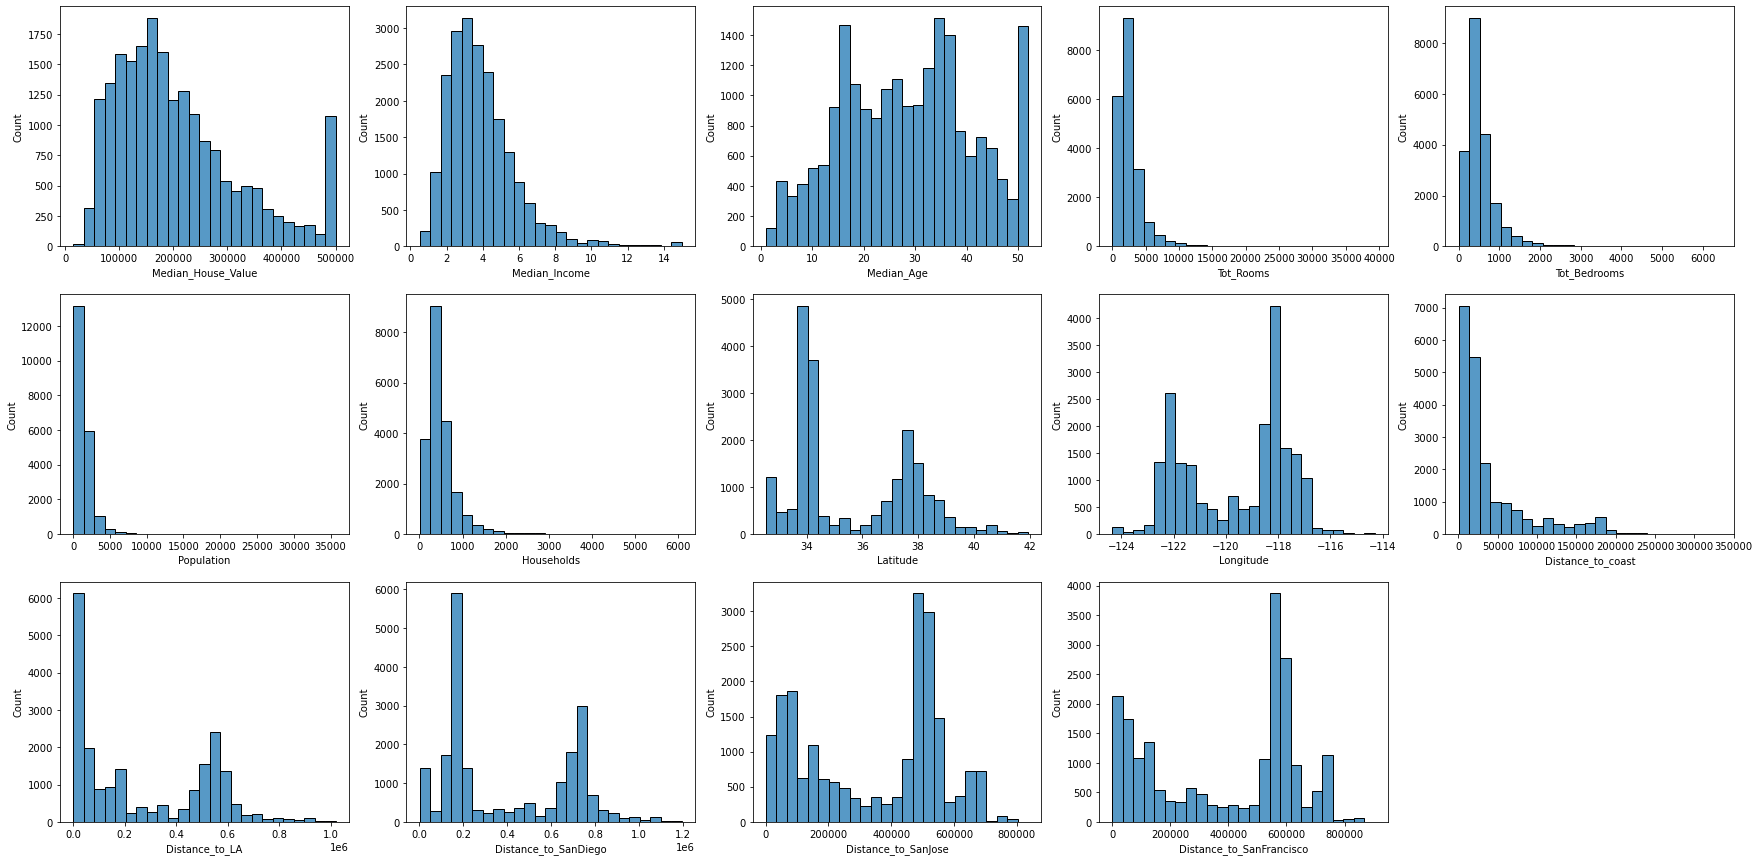

In [4]:
plt.figure(figsize=(30,15))
for i, column in enumerate(rawHouse_df.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(rawHouse_df[column], bins =25)

One interesting thing to note from the histograms is that most of the household blocks counted are closest to LA.

Furthermore, since both Los Angeles and San Diego are very close together, it is possible that the peak in the San Diego histogram are actually households which are close to LA.

The histograms for both San Jose and San Francisco are very similar, again possibly due to the fact that both cities are close together.

The number of blocks also seem to be very concentrated near the coast, however since all the cities have a coast line, this is not that surprising.

The median income resembles a left skewed normal distribution where most of the income lies between 20 and 60 thousand USD per year.

Naturally, I wanted to see if the house value increases the closer it is to the city centre with most households, LA.

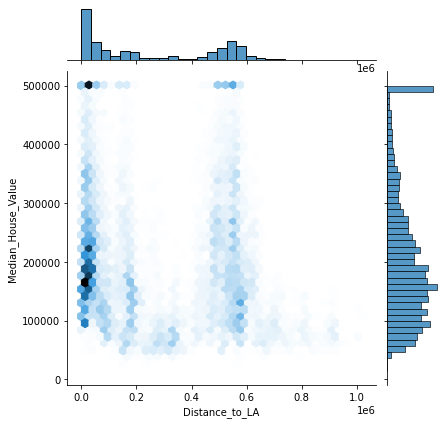

In [5]:
sns.jointplot(x = "Distance_to_LA",y = "Median_House_Value", data = rawHouse_df, kind = "hex")

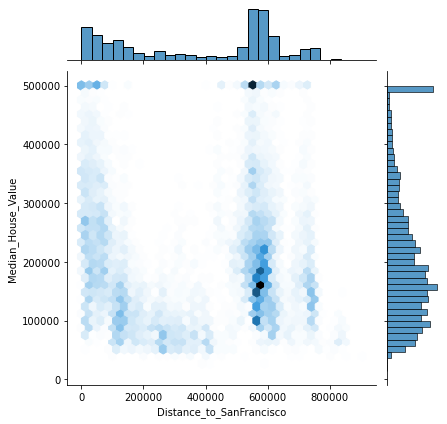

In [6]:
sns.jointplot(x = "Distance_to_SanFrancisco",y = "Median_House_Value", data = rawHouse_df, kind = "hex")

The graph shows that the majority of households with very high values were infact located closer to LA however the house values also seem to rise further away from LA as those houses are probably closer to the next city centre (San Francisco). 

I decided to make another joint plot but with distance to San Francisco instead and, sure enough, I am now positive that most of the households with high median value are actually concentrated in LA.

Interestingly though, the range of house values is still very high close to city centre so the majority of houses near the city are between a 100 - 200 thousand but more expensive houses do tend to be in the city centre. This may be due to the fact majority of households do not have very high incomes in the first place and so they can't afford to build/buy expensive houses.

<AxesSubplot:>

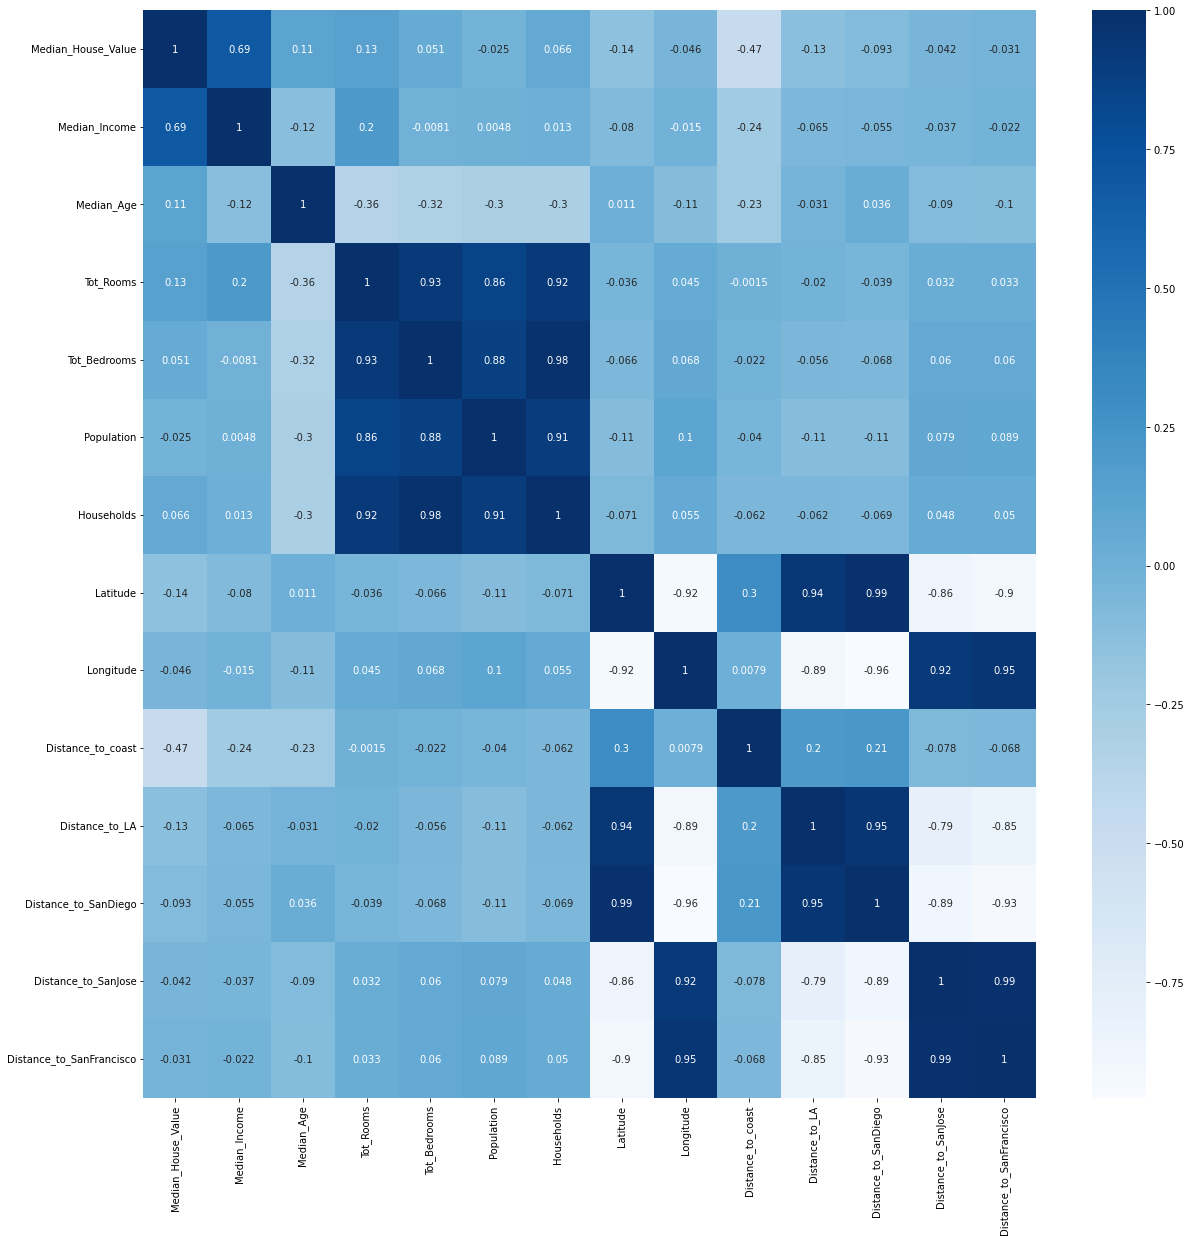

In [7]:
plt.figure(figsize = (20,20))

rawHouse_df_mx = rawHouse_df.corr()
sns.heatmap(rawHouse_df_mx, annot=True, cmap = "Blues")

Finally, I created a heatmap to see the general correlations between the variables. Obviously, there is are strong corellations between the distance variables. But also size of populations, number of households and total number of rooms and bedrooms seemed to be quite correlated.

As size of population in a block increases, so does the number of households and number of rooms/bedrooms but our dataset does not examine how it affects each individual household.

This inspired me to examine if households with lower median income actually end up having fewer rooms/bedrooms amongst themselves as they would be forced to share.

## Task 2: Data Analysis Pipeline

I wanted to examine if poorer households, had more people and lived in fewer rooms and bedrooms (forced to share).

To do this, I need to find the number of rooms/bedrooms per household as well as the number of people per household. 

A lot of our columns in our dataset can be either renamed or dropped.

In [8]:
relevantHouseData = pd.DataFrame(data = rawHouse_df)
#new columns:
relevantHouseData["Rooms per household"] = relevantHouseData["Tot_Rooms"].divide(relevantHouseData["Households"])
relevantHouseData["Bedrooms per household"] = relevantHouseData["Tot_Bedrooms"].divide(relevantHouseData["Households"])
relevantHouseData["People per household"] = relevantHouseData["Population"].divide(relevantHouseData["Households"])

#change median income to be in thousands
relevantHouseData["Median_Income"] = relevantHouseData["Median_Income"].apply(lambda x : x*10)
#drop and rename columns
relevantHouseData = relevantHouseData.drop(["Distance_to_coast", "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose", "Distance_to_SanFrancisco", "Longitude", "Latitude", "Tot_Rooms", "Tot_Bedrooms", "Median_Age"], axis = 1)
relevantHouseData = relevantHouseData.rename(columns = {"Median_House_Value": "Median House Value", "Median_Income": "Median Income (in thousands)", "Median_Age": "Median Age","Households" : "Number of Households"})

relevantHouseData.head()

,Median House Value,Median Income (in thousands),Population,Number of Households,Rooms per household,Bedrooms per household,People per household
0,452600.0,83.252,322,126,6.984127,1.023810,2.555556
1,358500.0,83.014,2401,1138,6.238137,0.971880,2.109842
2,352100.0,72.574,496,177,8.288136,1.073446,2.802260
3,341300.0,56.431,558,219,5.817352,1.073059,2.547945
4,342200.0,38.462,565,259,6.281853,1.081081,2.181467


Now, I need to clean/filter the data and see if there are any missing values...

In [9]:
relevantHouseData.isna().sum() 
#no missing values in our table

Median House Value              0
Median Income (in thousands)    0
Population                      0
Number of Households            0
Rooms per household             0
Bedrooms per household          0
People per household            0
dtype: int64

## Task 3: Method Chaining



In [10]:
def load_and_process(file):
    df_clean =(
        pd.read_csv(file)
        .drop(["Distance_to_coast", "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose", "Distance_to_SanFrancisco", "Longitude", "Latitude", "Median_Age"], axis = 1)
        .rename(columns = {"Median_House_Value": "Median House Value", "Median_Income": "Median Income (in thousands)", "Median_Age": "Median Age","Households" : "Number of Households"})
    )       
    df_refine =(
        df_clean
        .apply(lambda x: x * 10 if x.name == "Median Income (in thousands)" else x)
        .assign(Rooms_Per_Household = lambda x: (x["Tot_Rooms"]/x["Number of Households"]))
        .assign(Bedrooms_Per_Household = lambda x: (x["Tot_Bedrooms"]/x["Number of Households"]))
        .assign(People_Per_Household = lambda x: (x["Population"]/x["Number of Households"]))
        #note people per room was calculated wrongly before! did rooms/people instead of people/rooms
        .assign(People_Per_Room = lambda x: (x["People_Per_Household"]/x["Rooms_Per_Household"]))
        .drop(columns = ["Tot_Rooms","Tot_Bedrooms"])
        .rename(columns = {"Rooms_Per_Household": "Rooms per Household", "Bedrooms_Per_Household" : "Bedrooms per Household", "People_Per_Household": "People Per Household"})
    )
    return df_refine

## Task 4: Conduct my analysis

### Is there a relationship between median income and rooms per household?

I was curious and personally thought that larger and poorer households would have fewer rooms and more people between them.


<AxesSubplot:>

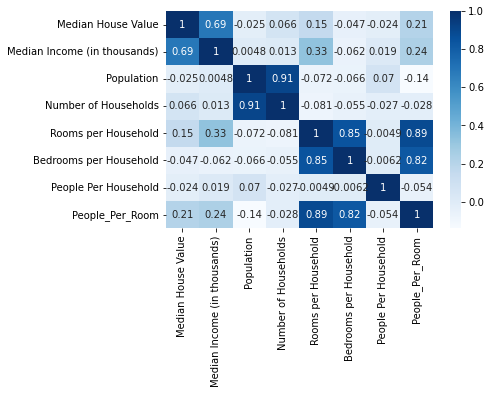

In [11]:
from project_functions1 import load_and_process as lp
finalDf = lp("../data/raw/California_Houses.csv")

finalDf_mx = finalDf.corr()
sns.heatmap(finalDf_mx,annot = True,cmap = "Blues")

## Observations
Our heatmap shows that there is actually a weak correlation between rooms per household and median income (0.33) and also between median income and people per room (0.24). 

However, I did expect poorer households to have fewer rooms to share so I was a bit surprised to see, that instead,  having a higher median income would result in more people per room.

However, these correlations are too low to conclude anything, I decided to have a look at how my data was distributed...



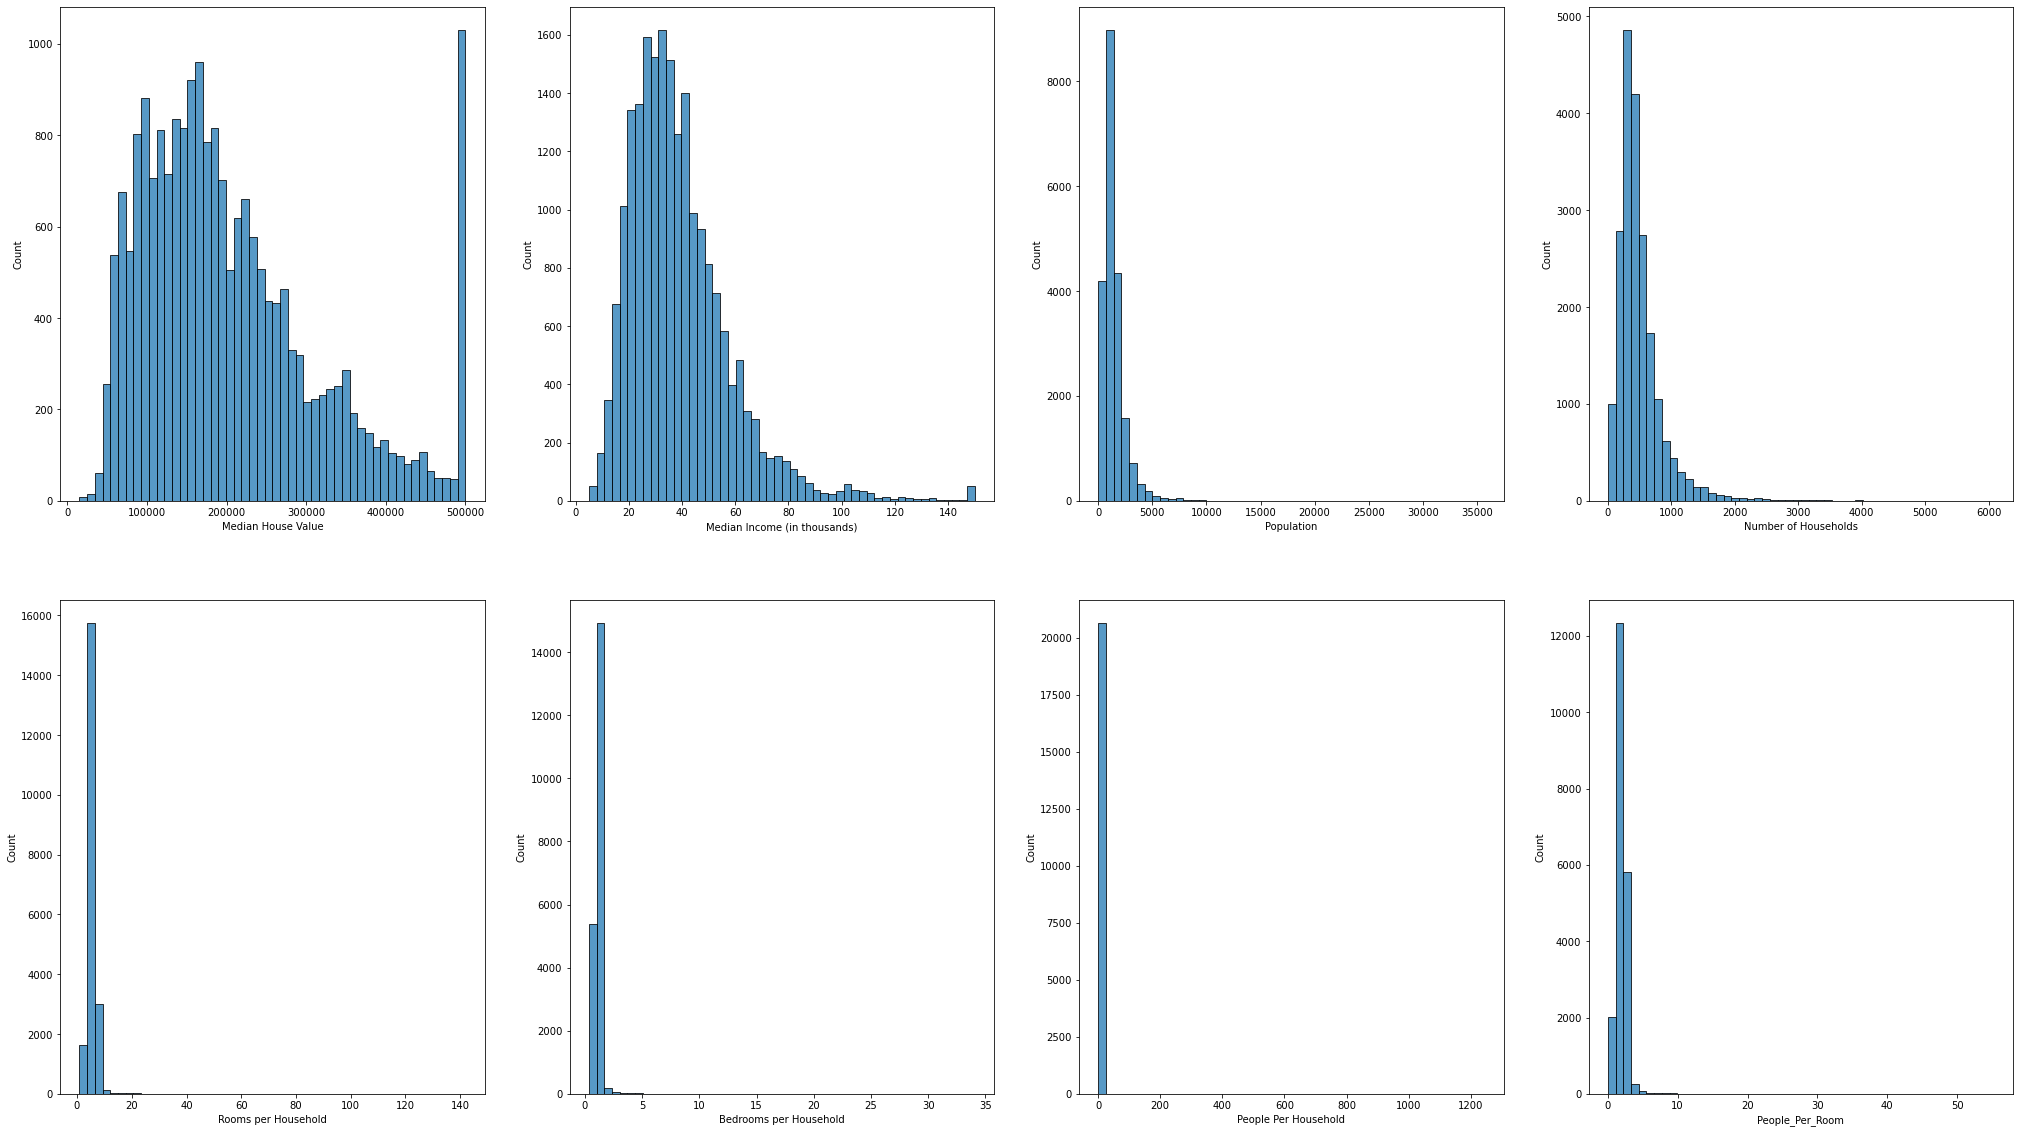

In [12]:
plt.figure(figsize= (35,20))
for i, column in enumerate(finalDf.columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(finalDf[column], bins =50)

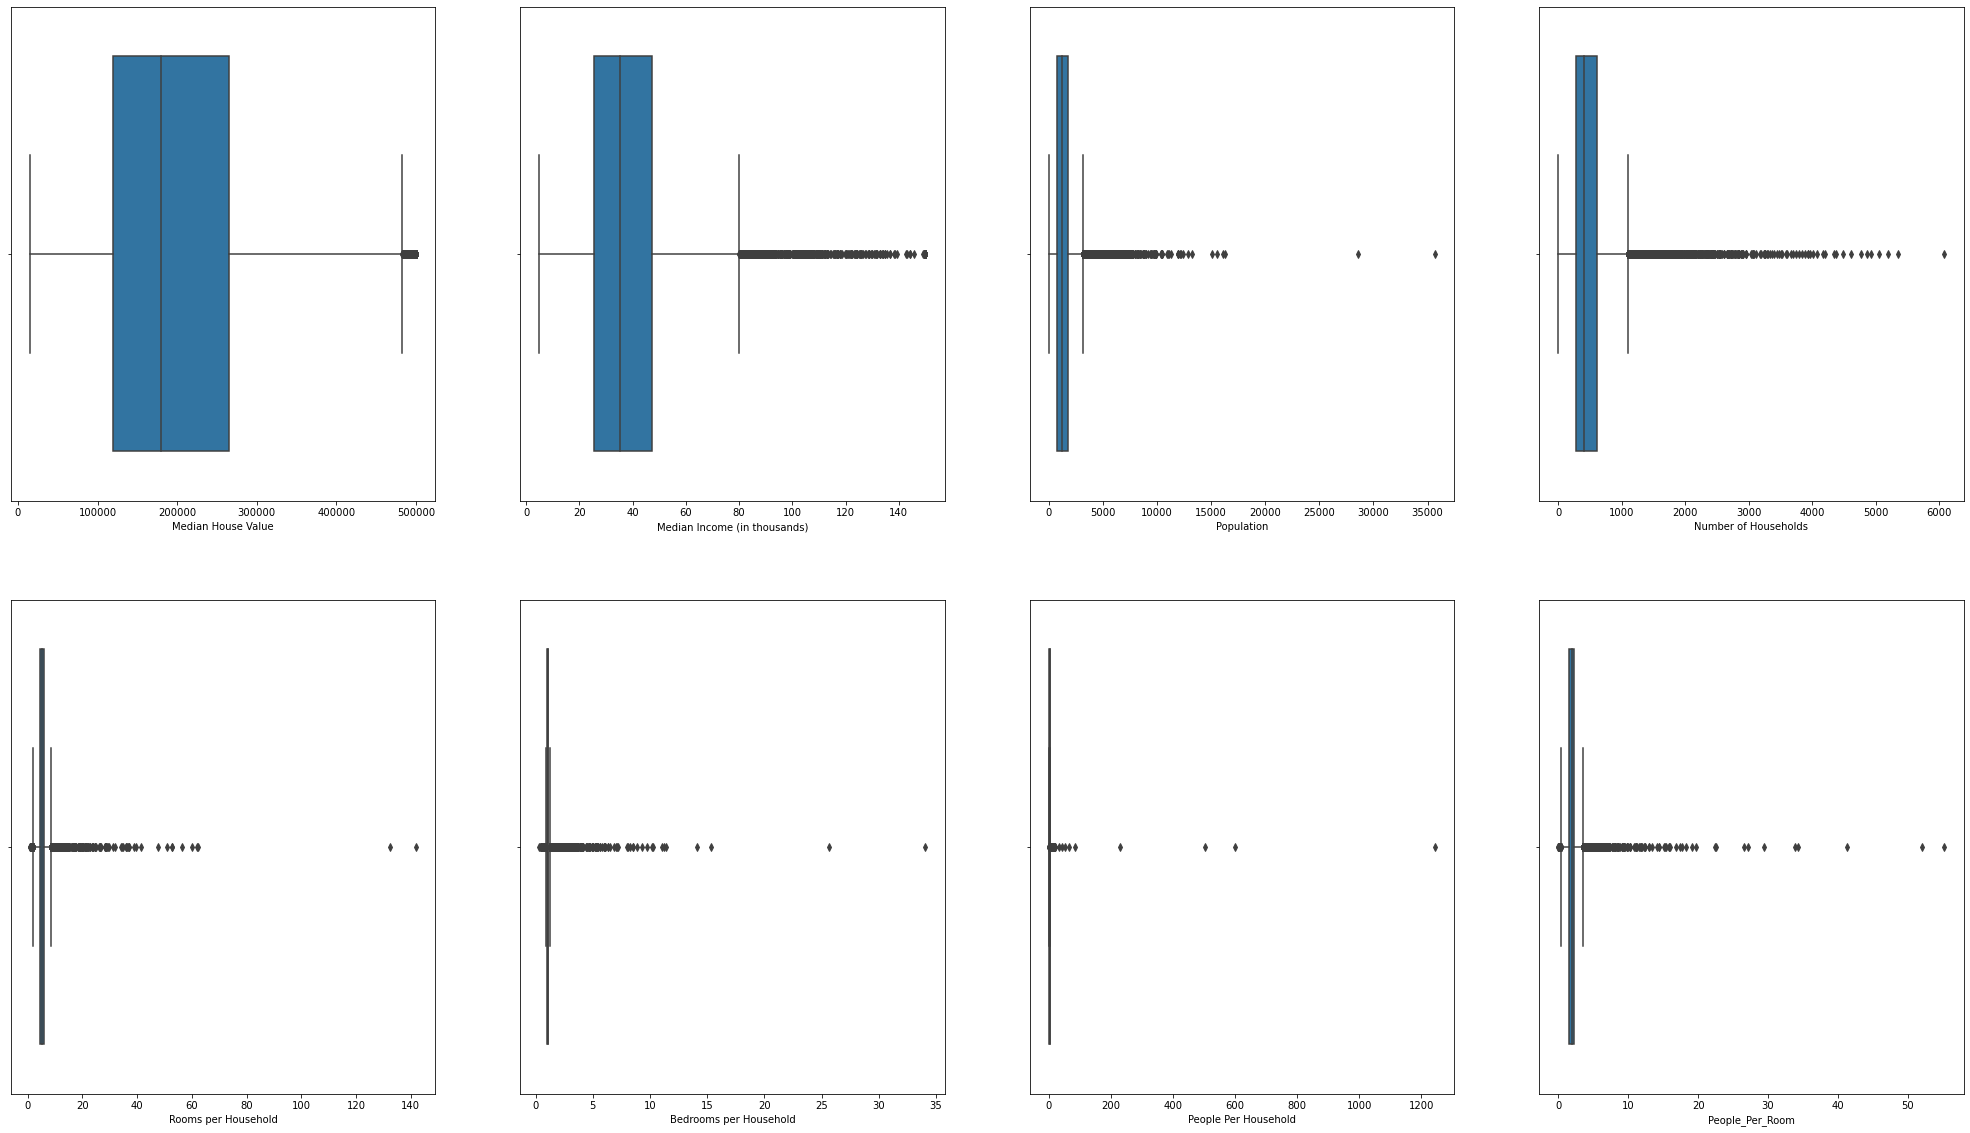

In [13]:
plt.figure(figsize= (35,20))
for i, column in enumerate(finalDf.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x = finalDf[column])


In [14]:
finalDf["People Per Household"].mean()

3.0706551594363742

## Observations on data distribution

In hindsight, I should seen this coming...
Most of my variables regarding people per room/rooms per household have very little variance. This kind of makes sense as household size may not depend on median income but possibly due to other factors.

At the same time, most of our data observed is from households whose median income between approximately 20 and 50 thousand per year. If I want to actually examine poor households and rich households, perhaps I need to exclude the IQR.

### Excluding the all observations from table that lie in IQR

In [15]:
finalDf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Median House Value,Median Income (in thousands),Population,Number of Households,Rooms per Household,Bedrooms per Household,People Per Household,People_Per_Room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,38.706710,1425.476744,499.539680,5.429000,1.096675,3.070655,1.976970
std,115395.615874,18.998217,1132.462122,382.329753,2.474173,0.473911,10.386050,1.146020
min,14999.000000,4.999000,3.000000,1.000000,0.846154,0.333333,0.692308,0.002547
25%,119600.000000,25.634000,787.000000,280.000000,4.440716,1.006079,2.429741,1.522382
50%,179700.000000,35.348000,1166.000000,409.000000,5.229129,1.048780,2.818116,1.937936
75%,264725.000000,47.432500,1725.000000,605.000000,6.052381,1.099526,3.282261,2.296090
max,500001.000000,150.001000,35682.000000,6082.000000,141.909091,34.066667,1243.333333,55.222222


So I would need to filter my current dataset and remove every observation between the 1st and 3rd quartile.

In [16]:
quartile1 = finalDf["Median Income (in thousands)"].quantile(0.25)
quartile3= finalDf["Median Income (in thousands)"].quantile(0.75)
outlierHouseDf = finalDf[(finalDf["Median Income (in thousands)"] > quartile3) | (finalDf["Median Income (in thousands)"] < quartile1)]
print("The dimensions are: ", outlierHouseDf.shape)
outlierHouseDf.head()

The dimensions are:  (10320, 8)


,Median House Value,Median Income (in thousands),Population,Number of Households,Rooms per Household,Bedrooms per Household,People Per Household,People_Per_Room
0,452600.0,83.252,322,126,6.984127,1.023810,2.555556,2.732919
1,358500.0,83.014,2401,1138,6.238137,0.971880,2.109842,2.956685
2,352100.0,72.574,496,177,8.288136,1.073446,2.802260,2.957661
3,341300.0,56.431,558,219,5.817352,1.073059,2.547945,2.283154
8,226700.0,20.804,1206,595,4.294118,1.117647,2.026891,2.118574


<AxesSubplot:>

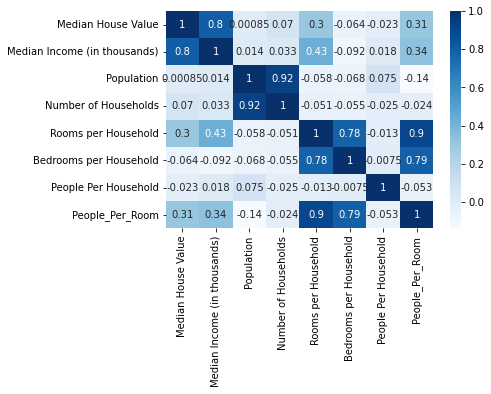

In [17]:
outlierHouseDf_mx = outlierHouseDf.corr()
sns.heatmap(outlierHouseDf_mx, annot = True, cmap = "Blues" )

#### Observations from the new heatmap
While both the correlation between rooms per household and median income, and the people per room and median income has increased by 0.1. The correlation is still weak. 

However, we could try make a joint plot to examine this further.

#### Jointplot:

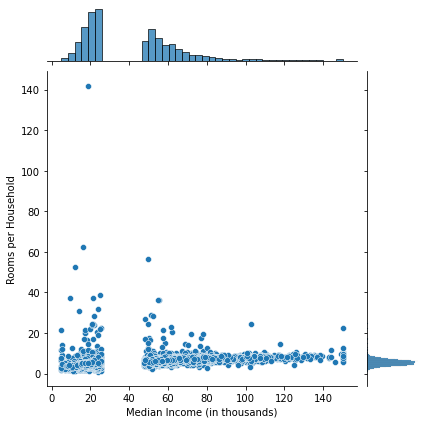

In [18]:
sns.jointplot(x = "Median Income (in thousands)",  y = "Rooms per Household",data = outlierHouseDf)

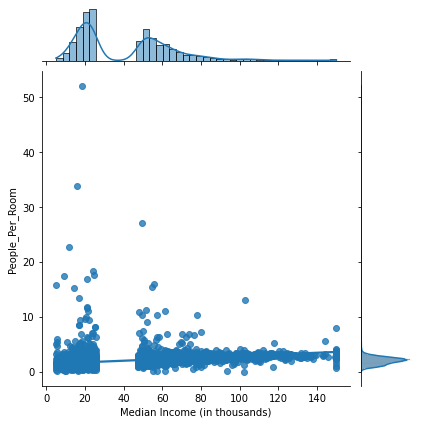

In [19]:
sns.jointplot(x = "Median Income (in thousands)",  y = "People_Per_Room",data = outlierHouseDf, kind = "reg")

While this joint plot does give me hope since there does seem to observations where there are far more people per room in households with income below 60 thousand, I decided to also look at the density by using a hex density joint plot:

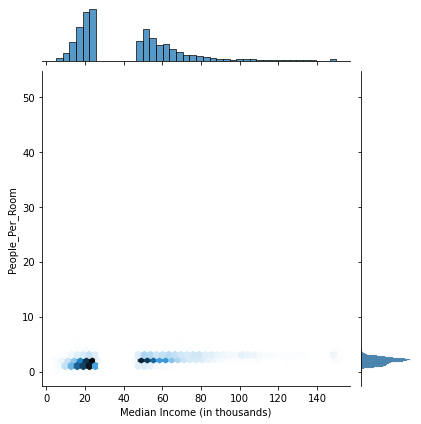

In [20]:
sns.jointplot(x = "Median Income (in thousands)",  y = "People_Per_Room",data = outlierHouseDf, kind = "hex")

The hex density plot does confirm that the majority of the data below the first quartile is concentrated and below 10 people per room. Whereas, as median income increased this distribution decreased, most probably because there are fewer rich households than poor.

Finally, I realised that anything more than 20 people per room would be seen far too extreme and so I decided to exclude those values too and try to see if there was any impact.

<AxesSubplot:>

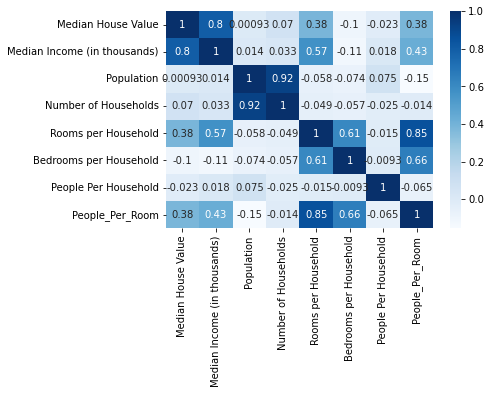

In [21]:
outlierHouseDf_maxPpl = outlierHouseDf[(outlierHouseDf["People_Per_Room"] < 20) ]
outlierHouseDf_maxPpl_mx = outlierHouseDf_maxPpl.corr()
sns.heatmap(outlierHouseDf_maxPpl_mx, annot = True, cmap = "Blues" )

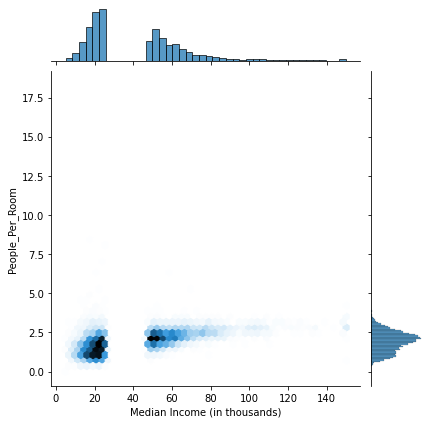

In [22]:
sns.jointplot(x = "Median Income (in thousands)",  y = "People_Per_Room",data = outlierHouseDf_maxPpl, kind = "hex")

## Conclusion
The data shows that ultimately most houses have roughly the same number of people per room and it does not seem to be too dependent on the median income.

This means that I have to reject my hypothesis and accept that median income of a household does not affect the people per room but it might affect the number of rooms per household.

However, on a side note, from my EDA, I was able to answer my previous interest as house median value did increase as it was closer to the city centre. I could have probably got a much higher correlation if I somehow found and excluded the households that were near another city centre.

In [26]:
def load_and_process(file):
    df_clean =(
        pd.read_csv(file)
        .drop(["Median_Age"], axis = 1)
        #"Distance_to_coast", "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose", "Distance_to_SanFrancisco", "Longitude", "Latitude",
        .rename(columns = {"Median_House_Value": "Median House Value", "Median_Income": "Median Income (in thousands)", "Median_Age": "Median Age","Households" : "Number of Households"
                          ,"Distance_to_coast": "Distance to Coast","Distance_to_LA": "Distance to LA", "Distance_to_SanDiego": "Distance to San Diego", "Distance_to_SanJose": "Distance to San Jose"})
    )       
    df_refine =(
        df_clean
        .apply(lambda x: x * 10 if x.name == "Median Income (in thousands)" else x)
        .assign(Rooms_Per_Household = lambda x: (x["Tot_Rooms"]/x["Number of Households"]))
        .assign(Bedrooms_Per_Household = lambda x: (x["Tot_Bedrooms"]/x["Number of Households"]))
        .assign(People_Per_Household = lambda x: (x["Population"]/x["Number of Households"]))
        .assign(People_Per_Room = lambda x: (x["People_Per_Household"]/x["Rooms_Per_Household"]))
        .drop(columns = ["Tot_Rooms","Tot_Bedrooms"])
        .rename(columns = {"Rooms_Per_Household": "Rooms per Household", "Bedrooms_Per_Household" : "Bedrooms per Household", "People_Per_Household": "People Per Household"})
    )
    return df_refine

In [29]:
#export csv to processed file for milestone 4
df_cleaned = load_and_process("../data/raw/California_Houses.csv")
df_cleaned.to_csv("../data/processed/California_Houses_clean.csv")
df_cleaned.head()

,Median House Value,Median Income (in thousands),Population,Number of Households,Latitude,Longitude,Distance to Coast,Distance to LA,Distance to San Diego,Distance to San Jose,Distance_to_SanFrancisco,Rooms per Household,Bedrooms per Household,People Per Household,People_Per_Room
0,452600.0,83.252,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,6.984127,1.023810,2.555556,0.365909
1,358500.0,83.014,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,6.238137,0.971880,2.109842,0.338217
2,352100.0,72.574,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,8.288136,1.073446,2.802260,0.338105
3,341300.0,56.431,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,5.817352,1.073059,2.547945,0.437991
4,342200.0,38.462,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,6.281853,1.081081,2.181467,0.347265
